In [656]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [885]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_absolute_error

## Train dataset overview

In [657]:
train=pd.read_csv("C:/Users/User/Documents/Project-Mina/train.csv")
meal=pd.read_csv("C:/Users/User/Documents/Project-Mina/meal_info.csv")
center=pd.read_csv("C:/Users/User/Documents/Project-Mina/fulfilment_center_info.csv")

In [658]:
print('train ',train.shape)
print('meal ',meal.shape)
print('center',center.shape)

train  (456548, 9)
meal  (51, 3)
center (77, 5)


In [659]:
t1=train.join(meal.set_index('meal_id'),on='meal_id')
t1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian


In [660]:
t1=t1.join(center.set_index('center_id'),on='center_id')
t1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [661]:
train=t1.copy()

In [662]:
train.shape

(456548, 15)

In [663]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [664]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

## Dropped id column from the dataset

In [665]:
train.drop('id',axis=1,inplace=True)

In [666]:
train.duplicated().sum()

0

In [667]:
train.columns.duplicated().sum()

0

### There are no null values nor duplicates

In [669]:
train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [670]:
train.columns.tolist()

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area']

In [759]:
num_col=['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'city_code',
 'region_code',
 'op_area']

cat_col=['emailer_for_promotion',
 'homepage_featured','category','cuisine','center_type']

## Correlation

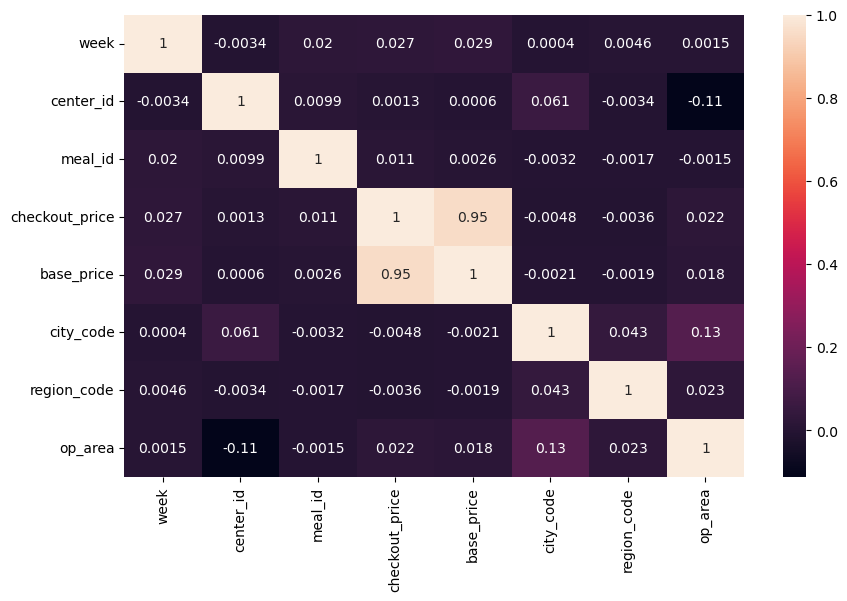

In [907]:
plt.figure(figsize=(10,6))
sns.heatmap(train[num_col].corr(),annot=True)
plt.show()

## Outliers

Outliers are not handled as it is the number of orders and we need the raw data

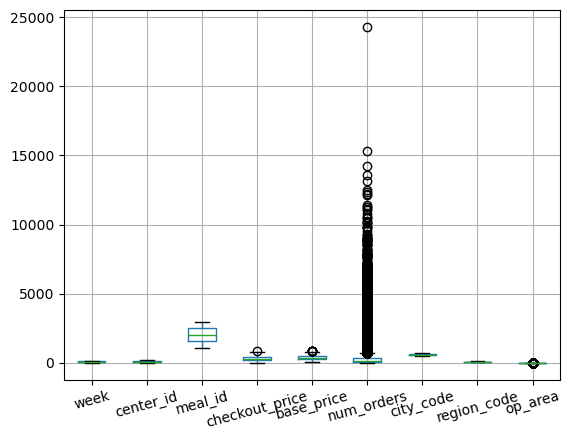

In [675]:
train[num_col].boxplot()
plt.xticks(rotation=15)
plt.show()

## EDA

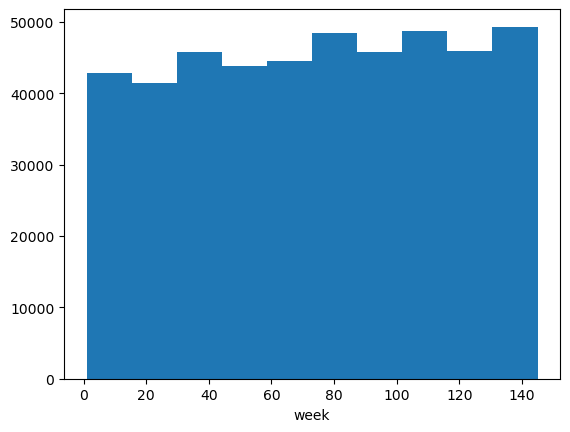

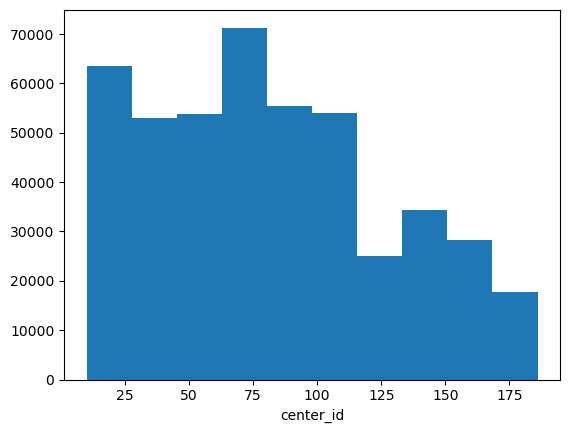

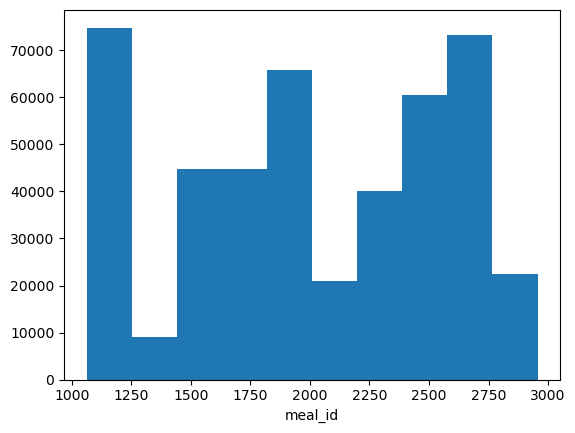

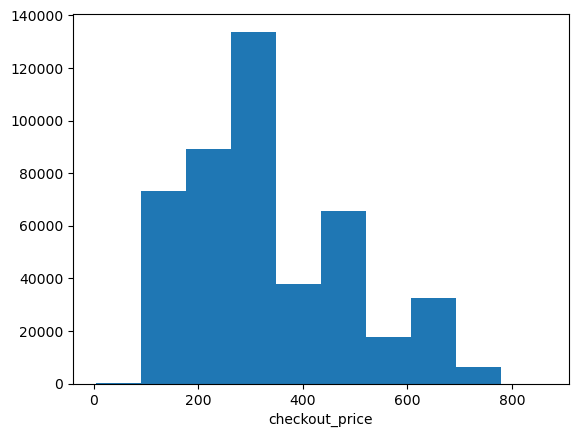

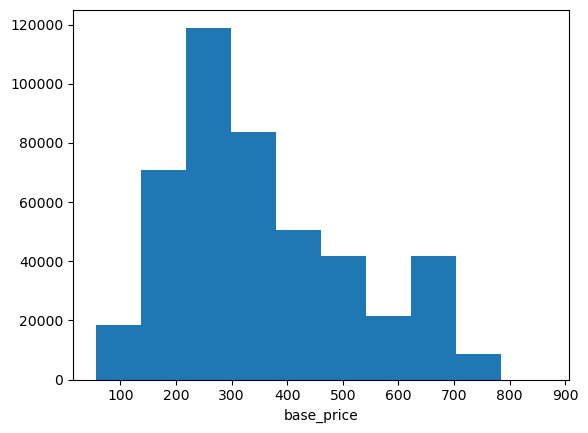

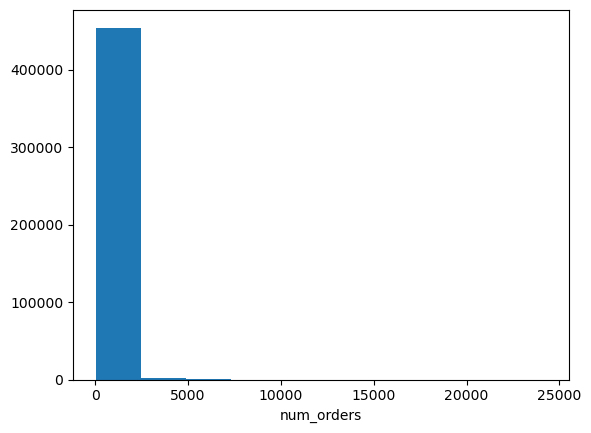

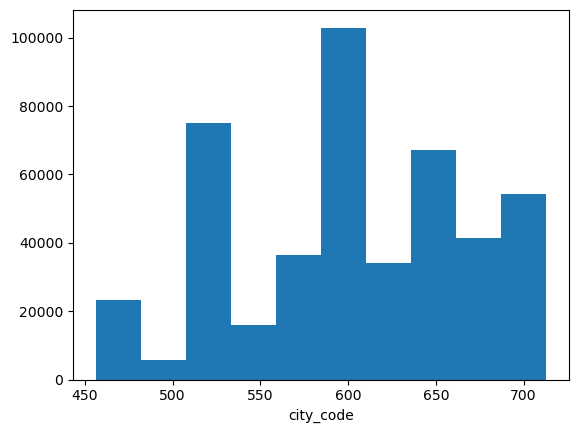

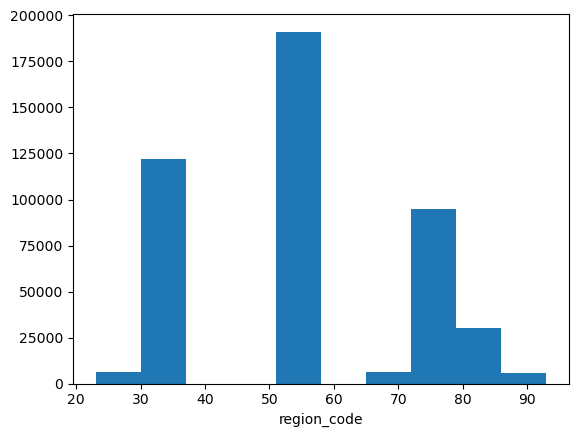

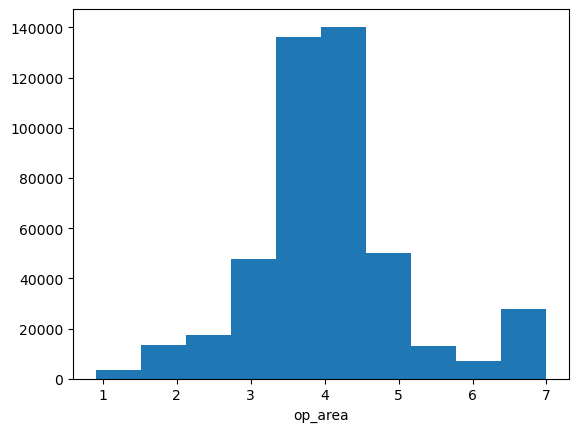

In [677]:
for col in num_col:
    plt.hist(train[col])
    plt.xlabel(col)
    plt.show()

## Scaling and Encoding

In [679]:
train[num_col].tail()

,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,op_area
456543,145,61,1543,484.09,484.09,68,473,77,4.5
456544,145,61,2304,482.09,482.09,42,473,77,4.5
456545,145,61,2664,237.68,321.07,501,473,77,4.5
456546,145,61,2569,243.50,313.34,729,473,77,4.5
456547,145,61,2490,292.03,290.03,162,473,77,4.5


In [680]:
num_col=['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'city_code',
 'region_code',
 'op_area']

In [681]:
scaler=StandardScaler()
train[num_col]=scaler.fit_transform(train[num_col])
train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,-1.776494,-0.589577,-0.254535,-1.277687,-1.256048,0,0,177,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
1,-1.776494,-0.589577,-0.057246,-1.277687,-1.358465,0,0,270,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
2,-1.776494,-0.589577,0.940160,-1.290568,-1.358278,0,0,189,Beverages,Thai,0.686548,-0.034837,TYPE_C,-1.9086
3,-1.776494,-0.589577,0.209460,0.047477,0.518763,0,0,54,Beverages,Indian,0.686548,-0.034837,TYPE_C,-1.9086
4,-1.776494,-0.589577,1.108221,-0.580222,-0.694746,0,0,40,Beverages,Indian,0.686548,-0.034837,TYPE_C,-1.9086


In [703]:
enc=OneHotEncoder(drop='first',sparse_output=False)
encoded=enc.fit_transform(train[cat_col])
feature_names=enc.get_feature_names_out(cat_col)
encoded_df=pd.DataFrame(encoded,columns=feature_names)

In [705]:
train=pd.concat([train,encoded_df],axis=1)
train.drop(['emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'center_type'],axis=1,inplace=True)

In [707]:
train.head()

,week,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,op_area,emailer_for_promotion_1,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,-1.776494,-0.589577,-0.254535,-1.277687,-1.256048,177,0.686548,-0.034837,-1.9086,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.776494,-0.589577,-0.057246,-1.277687,-1.358465,270,0.686548,-0.034837,-1.9086,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.776494,-0.589577,0.940160,-1.290568,-1.358278,189,0.686548,-0.034837,-1.9086,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.776494,-0.589577,0.209460,0.047477,0.518763,54,0.686548,-0.034837,-1.9086,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.776494,-0.589577,1.108221,-0.580222,-0.694746,40,0.686548,-0.034837,-1.9086,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Performed standard scaling on num cols and one hot encoding on cat cols

## Train test split

In [712]:
X=train.drop('num_orders',axis=1)
y=train['num_orders']

In [714]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [716]:
rfr=RandomForestRegressor(random_state=42)

In [718]:
rfr.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [719]:
y_pred=rfr.predict(X_test)

In [720]:
mean_squared_log_error(y_test,y_pred)

0.23933466531445322

In [ ]:
mean_absolute_error(y_test,y_pred)

In [889]:
dtr=DecisionTreeRegressor(random_state=42)

In [891]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [892]:
dtr_pred=dtr.predict(X_test)

In [895]:
mean_squared_log_error(y_test,dtr_pred)

0.4084762306587722

In [897]:
mean_absolute_error(y_test,dtr_pred)

89.41917643193517

# Test data

In [734]:
test=pd.read_csv("C:/Users/User/Documents/Project-Mina/test_QoiMO9B.csv")
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [736]:
print('test ',test.shape)
print('meal ',meal.shape)
print('center',center.shape)

test  (32573, 8)
meal  (51, 3)
center (77, 5)


In [740]:
t2=test.join(meal.set_index('meal_id'),on='meal_id')
t2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian


In [742]:
t2=t2.join(center.set_index('center_id'),on='center_id')
t2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0


In [744]:
test=t2.copy()

In [746]:
test.shape

(32573, 14)

In [749]:
test.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356,601.519971,56.712154,4.087726
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385,65.996677,17.641174,1.098835
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000,456.000000,23.000000,0.900000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000,556.000000,34.000000,3.600000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000,596.000000,56.000000,4.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000,651.000000,77.000000,4.500000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000,713.000000,93.000000,7.000000


In [751]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.5+ 

In [755]:
test.duplicated().sum()

0

In [757]:
test.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

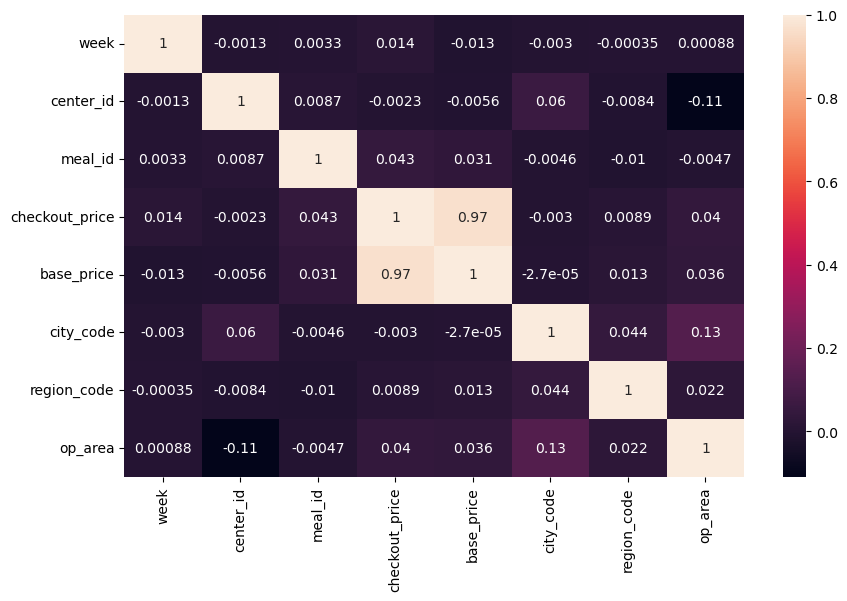

In [761]:
plt.figure(figsize=(10,6))
sns.heatmap(test[num_col].corr(),annot=True)
plt.show()

## Outliers

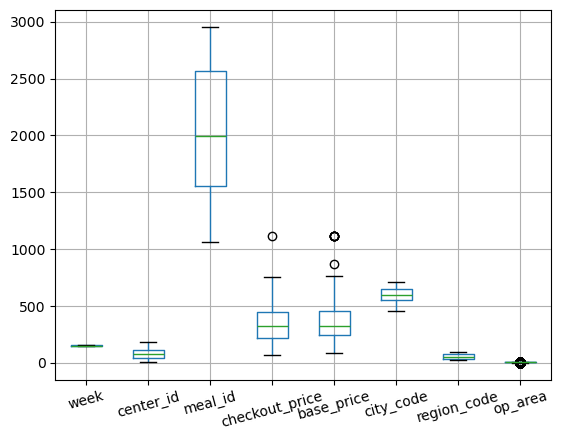

In [764]:
test[num_col].boxplot()
plt.xticks(rotation=15)
plt.show()

## EDA

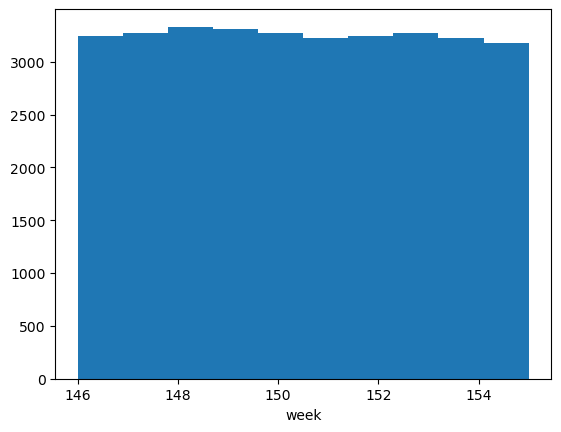

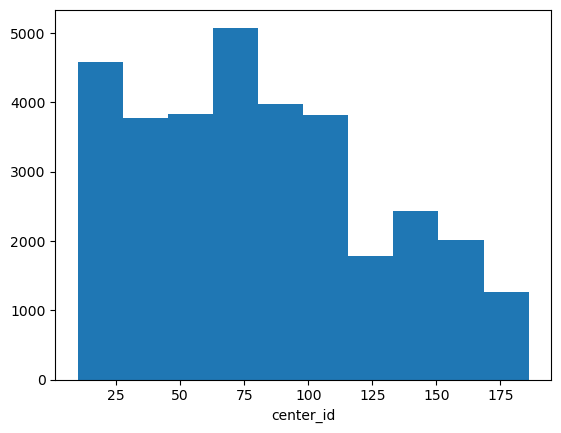

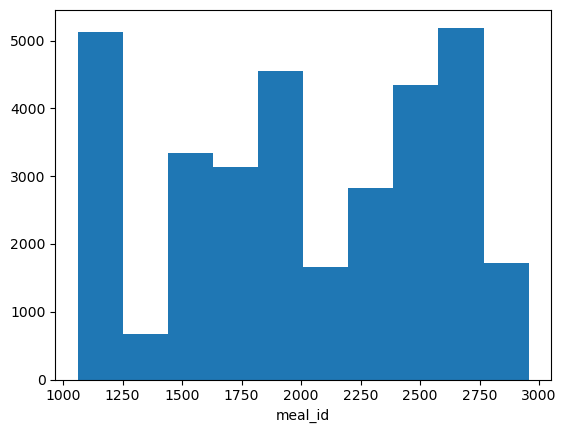

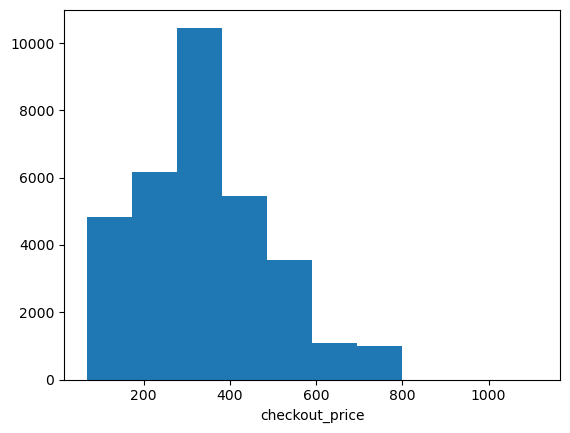

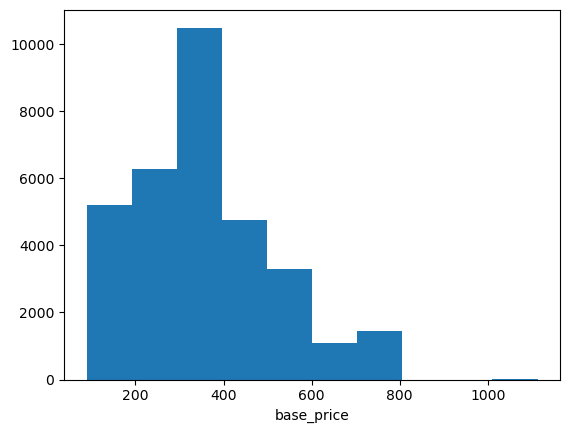

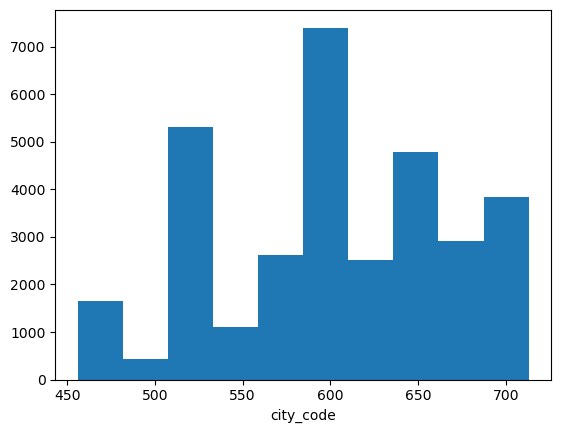

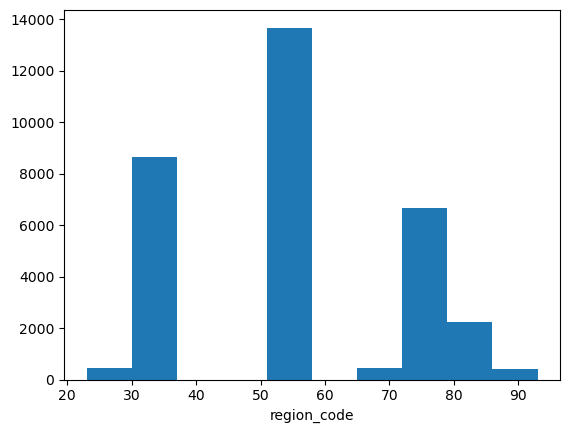

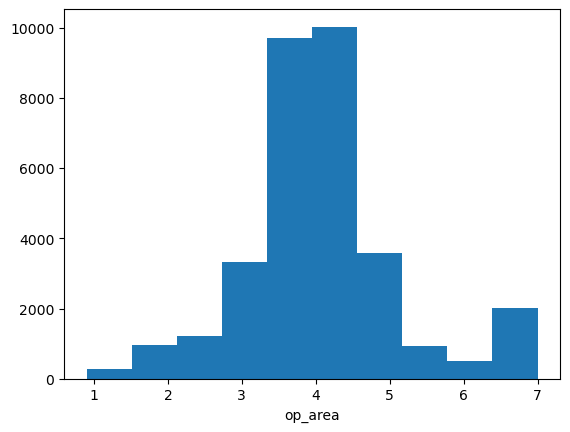

In [770]:
for col in num_col:
    plt.hist(test[col])
    plt.xlabel(col)
    plt.show()

## Scaling and Encoding

In [773]:
test[num_col].tail()

,week,center_id,meal_id,checkout_price,base_price,city_code,region_code,op_area
32568,155,61,1543,482.09,484.09,473,77,4.5
32569,155,61,2304,483.09,483.09,473,77,4.5
32570,155,61,2664,322.07,323.07,473,77,4.5
32571,155,61,2569,322.07,323.07,473,77,4.5
32572,155,61,2490,276.45,276.45,473,77,4.5


In [775]:
scaler=StandardScaler()
test[num_col]=scaler.fit_transform(test[num_col])
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,-1.563469,-0.58546,-0.268769,-1.193987,-1.272230,0,0,Beverages,Thai,0.689137,-0.040369,TYPE_C,-1.899975
1,1127204,-1.563469,-0.58546,-0.071397,-1.180991,-1.272230,0,0,Beverages,Thai,0.689137,-0.040369,TYPE_C,-1.899975
2,1212707,-1.563469,-0.58546,0.926427,-1.200290,-1.272037,0,0,Beverages,Thai,0.689137,-0.040369,TYPE_C,-1.899975
3,1082698,-1.563469,-0.58546,1.094558,-1.168579,-1.253474,0,0,Beverages,Indian,0.689137,-0.040369,TYPE_C,-1.899975
4,1400926,-1.563469,-0.58546,-1.432897,-1.156168,-1.241163,0,0,Beverages,Indian,0.689137,-0.040369,TYPE_C,-1.899975


In [777]:
enc=OneHotEncoder(drop='first',sparse_output=False)
encoded=enc.fit_transform(test[cat_col])
feature_names=enc.get_feature_names_out(cat_col)
encoded_df=pd.DataFrame(encoded,columns=feature_names)

In [779]:
test=pd.concat([test,encoded_df],axis=1)
test.drop(['emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'center_type'],axis=1,inplace=True)

In [781]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,city_code,region_code,op_area,emailer_for_promotion_1,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1028232,-1.563469,-0.58546,-0.268769,-1.193987,-1.272230,0.689137,-0.040369,-1.899975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1127204,-1.563469,-0.58546,-0.071397,-1.180991,-1.272230,0.689137,-0.040369,-1.899975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1212707,-1.563469,-0.58546,0.926427,-1.200290,-1.272037,0.689137,-0.040369,-1.899975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1082698,-1.563469,-0.58546,1.094558,-1.168579,-1.253474,0.689137,-0.040369,-1.899975,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1400926,-1.563469,-0.58546,-1.432897,-1.156168,-1.241163,0.689137,-0.040369,-1.899975,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Prediction

## Randomforest

In [794]:
rfr.fit(X,y)

RandomForestRegressor(random_state=42)

In [800]:
y_pred=rfr.predict(test.drop('id',axis=1))

decision tree

## Decision Tree Regressor

In [807]:
dtr=DecisionTreeRegressor(random_state=42)

In [837]:
dtr.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [839]:
dtr_pred=dtr.predict(test.drop('id',axis=1))

# Saving the predictions to another file

In [867]:
sample_df=pd.DataFrame(test['id'])

In [869]:
dtr=pd.DataFrame(dtr_pred,columns=['num_orders'])

In [871]:
sample_df=pd.concat([sample_df,dtr],axis=1)

In [873]:
sample_df

,id,num_orders
0,1028232,285.0
1,1127204,190.0
2,1212707,14.0
3,1082698,108.0
4,1400926,40.0
...,...,...
32568,1250239,28.0
32569,1039516,13.0
32570,1158107,215.0
32571,1444235,284.0


### DTR

In [912]:
sample_df.to_csv("Submission_dtr.csv",index=False)